In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras import layers


2023-09-22 15:17:07.067839: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# cargamos los datos 
with open('../../data/datasets/noisy_sine_dataset.npz', 'rb') as f:
    X = np.load(f)
    y = np.load(f)

In [3]:
X

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994,
        -9.91991992,  -9.8998999 ,  -9.87987988,  -9.85985986,
        -9.83983984,  -9.81981982,  -9.7997998 ,  -9.77977978,
        -9.75975976,  -9.73973974,  -9.71971972,  -9.6996997 ,
        -9.67967968,  -9.65965966,  -9.63963964,  -9.61961962,
        -9.5995996 ,  -9.57957958,  -9.55955956,  -9.53953954,
        -9.51951952,  -9.4994995 ,  -9.47947948,  -9.45945946,
        -9.43943944,  -9.41941942,  -9.3993994 ,  -9.37937938,
        -9.35935936,  -9.33933934,  -9.31931932,  -9.2992993 ,
        -9.27927928,  -9.25925926,  -9.23923924,  -9.21921922,
        -9.1991992 ,  -9.17917918,  -9.15915916,  -9.13913914,
        -9.11911912,  -9.0990991 ,  -9.07907908,  -9.05905906,
        -9.03903904,  -9.01901902,  -8.998999  ,  -8.97897898,
        -8.95895896,  -8.93893894,  -8.91891892,  -8.8988989 ,
        -8.87887888,  -8.85885886,  -8.83883884,  -8.81881882,
        -8.7987988 ,  -8.77877878,  -8.75875876,  -8.73

In [4]:
# creamos el modelo de RNA
model = K.Sequential()

model.add(layers.Dense(units=1, activation='linear', input_shape=[1]))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 8)                 16        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (9

In [9]:
model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1141
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1152
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1162
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1156
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1158
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1162
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1173
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1155
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1143
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1151
Epoch 11/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1156
Epoch 12/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1158
Epoch 13/500
32/32 [=================

In [10]:
y_predicted = model.predict(X)

32/32 [==============================] - 0s 2ms/step


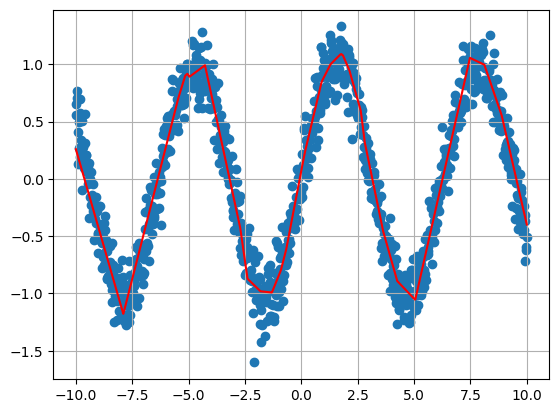

In [11]:
plt.scatter(X, y)
plt.plot(X, y_predicted, 'r-')
plt.grid(True)
plt.show()

In [13]:
pred = model.predict([[-9.71971971971972]])
pred

1/1 [==============================] - 0s 33ms/step


array([[0.06650905]], dtype=float32)

In [14]:
for i, layer in enumerate(model.layers):
    print('*'*25)
    print(model.layers[i].weights)

*************************
[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.49670777]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.15923508], dtype=float32)>]
*************************
[<tf.Variable 'dense_1/kernel:0' shape=(1, 8) dtype=float32, numpy=
array([[ 0.52037174, -0.6279191 , -0.5025324 ,  0.541753  ,  0.49894652,
        -0.5269143 , -0.7722976 ,  0.44355315]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(8,) dtype=float32, numpy=
array([-0.46825853, -0.8443456 ,  0.3809196 ,  0.33059815, -0.48589247,
       -0.07149912,  0.5407815 , -0.12850271], dtype=float32)>]
*************************
[<tf.Variable 'dense_2/kernel:0' shape=(8, 8) dtype=float32, numpy=
array([[ 0.39978746,  0.39418602,  0.14540137,  0.39383492,  0.36320403,
        -0.1347453 , -0.13889992,  0.18944055],
       [ 1.2735896 , -0.32106942,  0.14497066,  0.1054343 ,  0.71163   ,
        -0.9838501 , -0.47857136, -1.5378491 ],
    